In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

<h1>Regresion Lineal</h1>

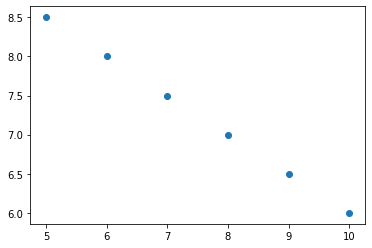

In [3]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5,8,7.5,7.0,6.5,6.0]

plt.scatter(car_prices, units_sold)

In [5]:
prices_array = np.array(car_prices).reshape(-1 , 1)
units_array = np.array(units_sold).reshape(-1 , 1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float().requires_grad_(True)

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.0181565023958683


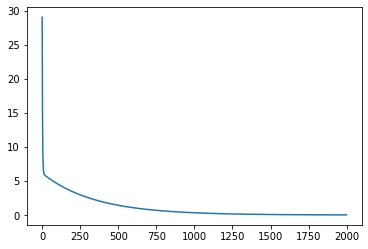

In [8]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
    pred = model(prices)
    loss = loss_function(pred, units)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print(float(loss))
plt.plot(range(iterations), losses)

In [9]:
x = torch.Tensor([4.0])
p = model(x)
p

tensor([8.7015], grad_fn=<AddBackward0>)

<h1>Regresion Logistica</h1>


In [25]:
n = 100
h = int(n/2)

dimen= 2

data = np.random.randn(n, dimen)*3
data

array([[-2.70080433, -1.79750794],
       [ 3.48305113, -3.82429968],
       [-0.67313328,  2.21399523],
       [-0.40034275, -2.57596542],
       [ 3.56690718, -2.7821685 ],
       [-0.174521  , -0.93542784],
       [ 0.87768132,  0.7155704 ],
       [ 1.90376833,  0.53603926],
       [-1.82542209,  0.05299729],
       [ 0.31926749,  2.26559702],
       [-3.6891927 , -0.3280147 ],
       [-4.88356043,  1.18106698],
       [ 1.64267977,  3.54583074],
       [-1.16156997,  0.67801214],
       [ 0.680115  , -2.5955009 ],
       [ 1.80374903,  4.29573541],
       [ 1.18663623, -5.87394017],
       [-0.63689701, -2.37307542],
       [-0.0187825 ,  3.54546956],
       [ 0.75906037,  4.01391199],
       [-1.70139336, -0.32522691],
       [ 0.3401854 ,  1.63290679],
       [ 2.24258481,  0.69580684],
       [ 3.22738568, -0.05505408],
       [ 8.54239051,  3.56952069],
       [-3.12643066, -0.73770585],
       [-1.32471452,  4.32833484],
       [ 2.58323694, -0.61963646],
       [-3.27731953,

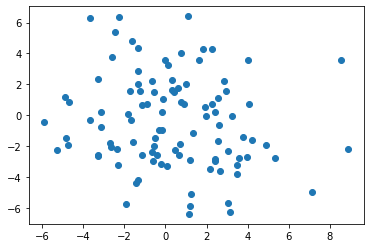

In [26]:
plt.scatter(data[:,0], data[:,1])

In [27]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [28]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

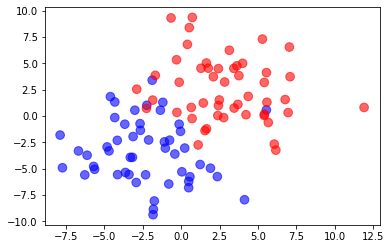

In [33]:
colors = ['blue', 'red']
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color , s=75, alpha=0.6)

In [36]:

target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1809, grad_fn=<BinaryCrossEntropyBackward>)

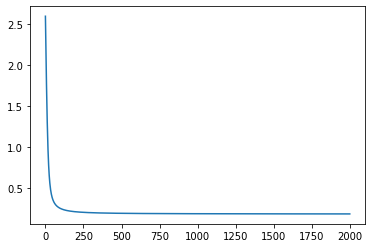

In [41]:
model = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
        )

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses = []
iterations = 2000

for i in range(iterations):
    result = model(x)
    loss = loss_function(result, y)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
plt.plot(range(iterations), losses)
loss

In [51]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])

blue
red


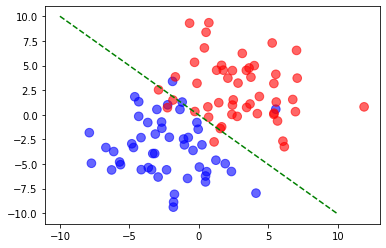

In [52]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()


plt.scatter(data[:, 0], data[:, 1] , c=color, s=75, alpha=0.6)

x_axis= np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')